# Initialization

In [1]:
#Import all the UTILITY functions
from UTILITY_quickstart import *

In [2]:
#Load a reference configuration
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline3.yml")

#Initialize tao object; tell it to run IMPACT-T to generate the initial beam
tao = initializeTao(
    csrTF = False,

    #Commands to start and run IMPACT-T. Overwriting some default settings, just to demonstrate
    runImpactTF = True,
    numMacroParticles = 1e4,
    impactChargepC = 1800,
    impactGridCount = 8
    # These settings give a very low fidelity simulation, but are selected to give a quick demo
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-S2E
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-S2E/setLattice_configs/defaults.yml
Running Impact
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-S2E/impact/tmpd9bcxf_3
/opt/homebrew/anaconda3/envs/bmad/bin/ImpactTexe
writing 10000 particles to /Users/nmajik/Documents/SLAC/FACET2-S2E/impact/tmpd9bcxf_3/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 10000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 6.97502773839391e-12 according to initial particles
Cathode start: Replaced Tini with -3.4942219079267073e-12 according to initial particles
Setting total charge to 1.8e-09 C
 !--------------------------------------------------

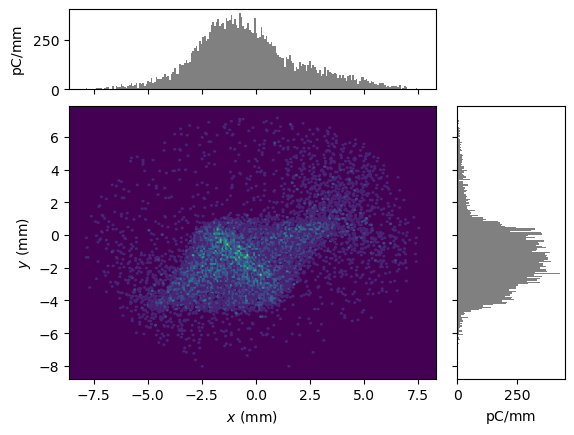

ParticleGroup with 10000 particles with total charge 1.8e-09 C


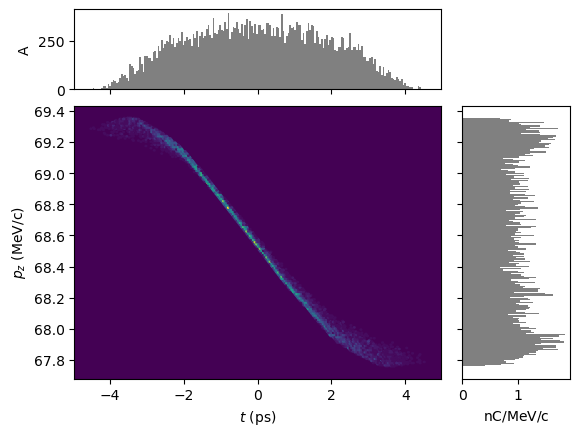

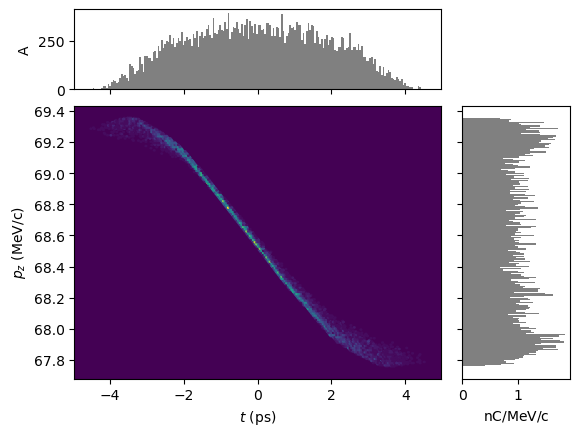

In [3]:
#Examine the beam IMPACT-T produced
P = ParticleGroup("./beams/activeBeamFile.h5")


display(plotMod(P, 'x', 'y',  bins=200));
plt.clf()

print(P)

#Plot the longitudinal phase space
display(plotMod(P, 't', 'pz',  bins=200));

# Track IMPACT-T beam to end

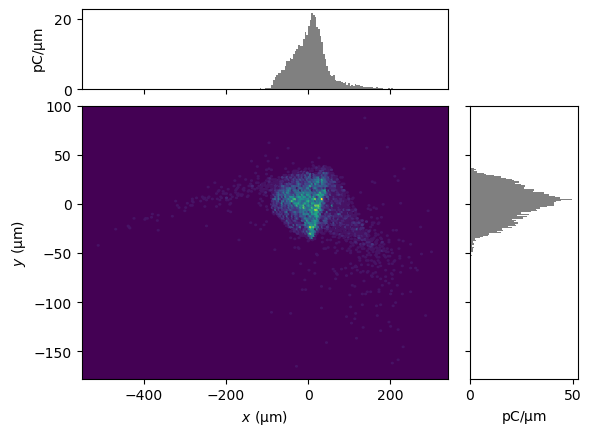

ParticleGroup with 9906 particles with total charge 1.7830800000000002e-09 C


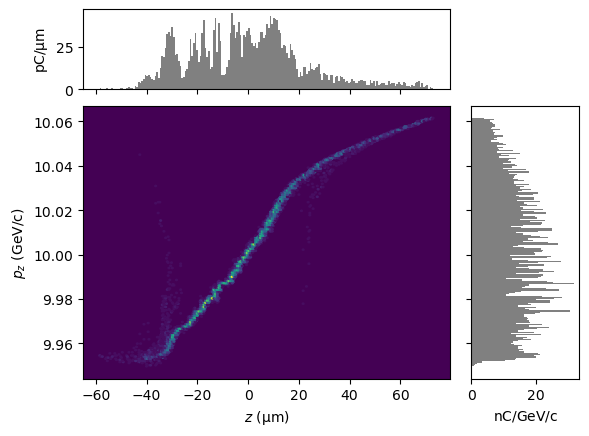

In [4]:
#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)

#Track the beam from start to end
trackBeam(tao, **importedDefaultSettings)

#Get the beam at element "PENT"
P =  getBeamAtElement(tao, "PENT")

#Plot the x-y projection of the beam at that location
display(plotMod(P, 'x', 'y',  bins=200));
plt.clf()

print(P)

#Plot the longitudinal phase space
display(plotMod(P, 'z', 'pz',  bins=200));

# Solenoid scan

In [ ]:
# Scan the solenoid values to find the optimum for emittance compensation
# Even at this very reduced fidelity, this block will still take many minutes to run

solenoidSettings = []
emittances = []

for solenoidTValue in np.arange(-0.5, -0.25, 0.05):
    tao = initializeTao(
        csrTF = False,
    
        #Commands to start and run IMPACT-T. Overwriting some default settings, just to demonstrate
        runImpactTF = True,
        numMacroParticles = 1e4,
        impactChargepC = 1800,
        impactGridCount = 8,
        # These settings give a very low fidelity simulation, but are selected to give a quick demo
        solenoidTValue = solenoidTValue
    )
    
    P = ParticleGroup("./beams/activeBeamFile.h5")

    solenoidSettings.append(solenoidTValue)
    emittances.append( smallestIntervalImpliedEmittance( P, plane = "x" ) )

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-S2E
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-S2E/setLattice_configs/defaults.yml
Running Impact
	 Impact: Autophasing


In [ ]:
plt.clf()
plt.scatter(solenoidSettings, 1e6 * np.array(emittances) )

# Adding title and labels
plt.xlabel('Solenoid setting [kG-m]')
plt.ylabel('Normalized SI90 X emittance [um-rad]')

# Display the plot
plt.show()